# NY Taxi Fare Prediction Model

By: Parth Khandenath

References used:
    
1. geeks for geeks

2. https://scikit-learn.org/stable/

Get the training and test data from https://www.kaggle.com/competitions/new-york-city-taxi-fare-prediction/code

# Part1

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train = pd.read_csv("train.csv",nrows= 1000000)
test = pd.read_csv("test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


## Part A
Data Cleansing

In [4]:
# Checking the no of rows & columns in the dataset
print("Shape of the Training data :", train.shape)

Shape of the Training data : (1000000, 8)


In [5]:
# See all the columns in the dataset
print("All columns are :", list(train.columns))

All columns are : ['key', 'fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']


In [6]:
# Checking datatypes & count of not-null values in each field
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   key                1000000 non-null  object 
 1   fare_amount        1000000 non-null  float64
 2   pickup_datetime    1000000 non-null  object 
 3   pickup_longitude   1000000 non-null  float64
 4   pickup_latitude    1000000 non-null  float64
 5   dropoff_longitude  999990 non-null   float64
 6   dropoff_latitude   999990 non-null   float64
 7   passenger_count    1000000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 61.0+ MB


As you can see in the above cell, there are some null-values for dropoff_longitude and dropoff_latitude, becuase the number of entries is greater than number of non-null values for dropoff_longitude and dropoff_latitude.

In [7]:
#checking how many null values in train dataset
print('number of entries in train.csv with dropoff_longitude = null : ',train['dropoff_longitude'].isnull().sum())
print('number of entries in train.csv with dropoff_latitude = null : ',train['dropoff_latitude'].isnull().sum())  

number of entries in train.csv with dropoff_longitude = null :  10
number of entries in train.csv with dropoff_latitude = null :  10


In [8]:
#checking how many null values in test dataset
print('number of entries in test.csv with dropoff_longitude = null : ',train['dropoff_longitude'].isnull().sum())
print('number of entries in test.csv with dropoff_latitude = null : ',train['dropoff_latitude'].isnull().sum())  

number of entries in test.csv with dropoff_longitude = null :  10
number of entries in test.csv with dropoff_latitude = null :  10


In [9]:
#dropping the entries with null values
#saving the data hence obtained in another variable (for both test and train)
train1=train.dropna(inplace=False,axis=0,subset=['dropoff_longitude','dropoff_latitude'])
test1=test.dropna(inplace=False,axis=0,subset=['dropoff_longitude','dropoff_latitude'])

In [10]:
train1.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

As seen in above cell, train1 has no null values 

In [11]:
test1.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

As seen in above cell, test1 has no null values 

In [12]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000,999990.000000
mean,11.347953,-72.526699,39.929040,-72.527860,39.919954,1.684941
std,9.821790,12.057778,7.626087,11.324494,8.201418,1.323907
min,-44.900000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734046,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967094,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


In the above cell we see that there are also negative fare_amounts (because the min value of fare_amount is negative). These are not practical, hence we will remove such entries.

In [13]:
train1=train1.drop(train1[train1['fare_amount'] <= 0].index)

In [14]:
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000,999923.000000
mean,11.348945,-72.526826,39.929108,-72.528356,39.920225,1.684955
std,9.821201,12.057522,7.626026,11.323010,8.200913,1.323921
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,0.000000
25%,6.000000,-73.992060,40.734965,-73.991385,40.734047,1.000000
50%,8.500000,-73.981792,40.752695,-73.980135,40.753166,1.000000
75%,12.500000,-73.967095,40.767154,-73.963654,40.768129,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,208.000000


as you can see above the min value of fare_amount now is 0.
But now we notice that the values of passenger_count are going as high as 208, which is impossible, hence now we will remove such entries.

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

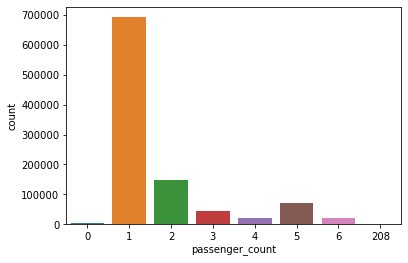

In [15]:
sns.countplot(x='passenger_count',data=train1)

clearly passenger_count = 208 is an outlier

The test data has max 6 passengers per taxi [as can be seen in the cell below], which seems possible. Hence, I will remove the entries with passengers more than 6.

In [16]:
test1.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [17]:
train1=train1.drop(train1[train1['passenger_count']>6].index) #removed the entries with passenger_count > 6
train1=train1.drop(train1[train1['passenger_count']<=0].index) 
train1.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996367.000000,996367.000000,996367.000000,996367.000000,996367.000000,996367.000000
mean,11.358168,-72.526028,39.928583,-72.527717,39.919749,1.690760
std,9.831083,12.065813,7.633285,11.328668,8.209446,1.306192
min,0.010000,-3377.680935,-3116.285383,-3383.296608,-3114.338567,1.000000
25%,6.000000,-73.992060,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768128,2.000000
max,500.000000,2522.271325,2621.628430,45.581619,1651.553433,6.000000


Now we see a new problem. Latitude ranges from -90 to +90. Longitude ranges from -180 to +180. But the training set has entries with data points outside these ranges.

In [18]:
train1=train1.drop(train1[train1['pickup_latitude']>90].index)
train1=train1.drop(train1[train1['pickup_latitude']<-90].index)
train1=train1.drop(train1[train1['dropoff_latitude']>90].index)
train1=train1.drop(train1[train1['dropoff_latitude']<-90].index)
train1.describe()
#deleted all entries with either pickup_latitude or dropoff_latitude out of range [-90,+90] 
#removal of outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996347.000000,996347.000000,996347.000000,996347.000000,996347.000000,996347.000000
mean,11.358147,-72.524663,39.926295,-72.521159,39.925577,1.690769
std,9.831112,10.696864,6.092049,10.629572,6.095901,1.306197
min,0.010000,-1452.988333,-74.016587,-1329.621332,-74.035197,1.000000
25%,6.000000,-73.992060,40.734961,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768127,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


In [19]:
train1=train1.drop(train1[train1['pickup_longitude']>180].index)
train1=train1.drop(train1[train1['pickup_longitude']<-180].index)
train1=train1.drop(train1[train1['dropoff_longitude']>180].index)
train1=train1.drop(train1[train1['dropoff_longitude']<-180].index)
train1.describe()
#deleted all entries with either pickup_longitude or dropoff_longitude out of range [-180,+180]
#removal of outliers

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,996327.000000,996327.000000,996327.000000,996327.000000,996327.000000,996327.000000
mean,11.358141,-72.516598,39.926279,-72.515035,39.925683,1.690758
std,9.831069,10.396380,6.092109,10.398391,6.095567,1.306180
min,0.010000,-128.175950,-74.016587,-121.391248,-74.035197,1.000000
25%,6.000000,-73.992059,40.734960,-73.991383,40.734043,1.000000
50%,8.500000,-73.981792,40.752692,-73.980134,40.753163,1.000000
75%,12.500000,-73.967092,40.767152,-73.963650,40.768127,2.000000
max,500.000000,40.850357,69.400000,45.581619,81.510177,6.000000


Now the columns we have are key , fare_amount, etc. But the column key does not really contribute anything to the learning of our model.

So we will drop the feature/column of key from our train and test data.

In [20]:
train1=train1.drop("key",axis="columns")
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 996327 entries, 0 to 999999
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        996327 non-null  float64
 1   pickup_datetime    996327 non-null  object 
 2   pickup_longitude   996327 non-null  float64
 3   pickup_latitude    996327 non-null  float64
 4   dropoff_longitude  996327 non-null  float64
 5   dropoff_latitude   996327 non-null  float64
 6   passenger_count    996327 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 60.8+ MB


In [21]:
test1=test1.drop("key",axis="columns")
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9914 entries, 0 to 9913
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pickup_datetime    9914 non-null   object 
 1   pickup_longitude   9914 non-null   float64
 2   pickup_latitude    9914 non-null   float64
 3   dropoff_longitude  9914 non-null   float64
 4   dropoff_latitude   9914 non-null   float64
 5   passenger_count    9914 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 464.8+ KB


Now we will split the pickup dae and time into separate columns because year, month, day, time, etc. do play an important role in deciding the fares

In [22]:
train1['year']=pd.DatetimeIndex(train1['pickup_datetime']).year

In [23]:
train1['month']=pd.DatetimeIndex(train1['pickup_datetime']).month

In [25]:
train1['day']=pd.DatetimeIndex(train1['pickup_datetime']).day

In [26]:
# import time
# st=time.time()
train1['hour']=pd.DatetimeIndex(train1['pickup_datetime']).hour
# print(time.time()-st)

In [27]:
train1['minute']=pd.DatetimeIndex(train1['pickup_datetime']).minute

In [28]:
test1['year']=pd.DatetimeIndex(test1['pickup_datetime']).year

In [29]:
test1['month']=pd.DatetimeIndex(test1['pickup_datetime']).month

In [30]:
test1['day']=pd.DatetimeIndex(test1['pickup_datetime']).day

In [31]:
test1['hour']=pd.DatetimeIndex(test1['pickup_datetime']).hour

In [32]:
test1['minute']=pd.DatetimeIndex(test1['pickup_datetime']).minute

Now, we don't need the pickup_datetime column anymore, also we will drop the minute column to avoid making the model too complex 

let us check how strongly the independent variables affect the target variable, using the correlation coefficient

In [33]:
train1.to_csv('train2.csv', index = False) #saving all the progress till now 

In [34]:
train2=pd.read_csv('train2.csv')

In [35]:
train2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51


In [36]:
def dayofweek(stringlist):
    d={}
    d['Monday']=0
    d['Tuesday']=1
    d['Wednesday']=2
    d['Thursday']=3
    d['Friday']=4
    d['Saturday']=5
    d['Sunday']=6
    ans=[]
    for stri in stringlist:
        ans.append(d[stri])
    return ans

we have the day of week function ready, just need to figure out how to pass out the values of year, month and day for each row.

In [37]:
train2['day_of_week']=pd.to_datetime(train2[['year', 'month', 'day']]).dt.day_name() 
#calculating if monday, tuesday, wednesday... from date, and storing in day_of_week column

In [38]:
train2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,day_of_week
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,Monday
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,Tuesday
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,Thursday
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,Saturday
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,Tuesday


our day_of_week is categorical feature with string values currently. It will be more helpful in analysis if we convert it to numerical values

In [39]:
string_day_of_week=train2['day_of_week'].tolist() #store all days in this list
numerical_day_of_week= dayofweek(string_day_of_week) #send the list to the function
train2=train2.assign(day_of_week=numerical_day_of_week) #put the numeric values instead of monday, tuesday...

In [40]:
train2.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute,day_of_week
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1,2009,6,15,17,26,0
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1,2010,1,5,16,52,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2,2011,8,18,0,35,3
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1,2012,4,21,4,30,5
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1,2010,3,9,7,51,1


In [41]:
test1.head()

,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,minute
0,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1,2015,1,27,13,8
1,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1,2015,1,27,13,8
2,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1,2011,10,8,11,53
3,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1,2012,12,1,21,12
4,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1,2012,12,1,21,12


now obtaining day_of_week for test data

In [42]:
test1['day_of_week']=pd.to_datetime(test1[['year', 'month', 'day']]).dt.day_name() 
string_day_of_week=test1['day_of_week'].tolist() 
numerical_day_of_week= dayofweek(string_day_of_week)
test1=test1.assign(day_of_week=numerical_day_of_week)

now the feature pickup_datetime is not gonna be too useful so drop it, and minute too is not a very important feature, hence we will drop that too.

In [43]:
train3=train2.drop(['pickup_datetime','minute'],axis=1)
test3=test1.drop(['pickup_datetime','minute'],axis=1)

In [44]:
train3.dtypes

fare_amount          float64
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
hour                   int64
day_of_week            int64
dtype: object

In [45]:
test3.dtypes

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
year                   int64
month                  int64
day                    int64
hour                   int64
day_of_week            int64
dtype: object

we will now find the travel distance from the latitudes and longitudes,using haversine distance as distance is an important factor in predicting the fare.

In [46]:
def haversine_distance(lat1, long1, lat2, long2):
    data = [train3, test3]
    for i in data:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d

In [47]:
haversine_distance('pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

0        2.323260
1        2.425353
2        0.618628
3        1.961033
4        5.387301
          ...    
9909     2.124874
9910     3.270969
9911    19.183941
9912     8.343486
9913     1.180825
Length: 9914, dtype: float64

In [48]:
#now we will analyse the correlations between target and independent variables
train3.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,H_Distance
fare_amount,1.000000,0.009614,-0.009016,0.010383,-0.010247,0.011915,0.115840,0.024922,0.001504,-0.018977,0.002669,0.025153
pickup_longitude,0.009614,1.000000,-0.979181,0.954788,-0.941600,-0.000837,0.006942,-0.001323,0.005918,-0.000238,0.002252,0.142878
pickup_latitude,-0.009016,-0.979181,1.000000,-0.941404,0.962559,-0.000084,-0.009391,0.002858,-0.009183,0.000446,-0.003574,-0.124016
dropoff_longitude,0.010383,0.954788,-0.941404,1.000000,-0.979498,-0.000705,0.008682,-0.001501,0.005182,-0.000981,0.002531,0.144421
dropoff_latitude,-0.010247,-0.941600,0.962559,-0.979498,1.000000,-0.000397,-0.010972,0.002961,-0.008619,0.000938,-0.003712,-0.126490
passenger_count,0.011915,-0.000837,-0.000084,-0.000705,-0.000397,1.000000,0.004369,0.005003,0.004436,0.017077,0.036640,-0.000375
year,0.115840,0.006942,-0.009391,0.008682,-0.010972,0.004369,1.000000,-0.118316,-0.009967,0.002179,0.009024,0.025389
month,0.024922,-0.001323,0.002858,-0.001501,0.002961,0.005003,-0.118316,1.000000,-0.015720,-0.004137,-0.007725,0.000730
day,0.001504,0.005918,-0.009183,0.005182,-0.008619,0.004436,-0.009967,-0.015720,1.000000,0.001979,0.007403,0.000263
hour,-0.018977,-0.000238,0.000446,-0.000981,0.000938,0.017077,0.002179,-0.004137,0.001979,1.000000,-0.087993,-0.001027


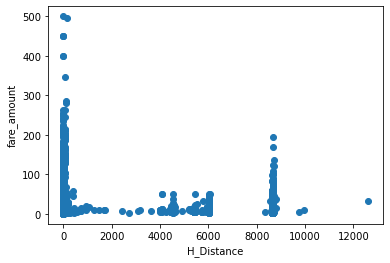

In [49]:
#let's analyse H_Distance
plt.scatter(x=train3['H_Distance'],y=train3['fare_amount'])
plt.xlabel('H_Distance')
plt.ylabel('fare_amount')
plt.show()

as seen from above graph, we can say that entries with H_distance above upper_limit are outliers, and we will remove them. Let's find the upper_limit.

In [50]:
q1=train3['H_Distance'].quantile(0.25)
q3=train3['H_Distance'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr

In [51]:
train3=train3.drop(train3[train3['H_Distance']>=upper_limit].index) #removing outliers from H_distance

In [52]:
train3['fare_per_person_per_unit_distance']=train3['fare_amount']/(train3['passenger_count']*train3['H_Distance'])
#calculating fare per person per unit distance

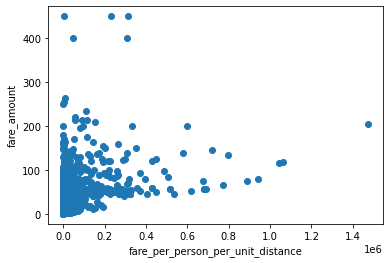

In [53]:
plt.scatter(x=train3['fare_per_person_per_unit_distance'],y=train3['fare_amount'])
plt.xlabel('fare_per_person_per_unit_distance')
plt.ylabel('fare_amount')
plt.show()

From the above graph we can remove outliers i.e. the entries with fare_per_person_per_unit_distance > upper_limit.
Let's find the upper limit

In [54]:
q1=train3['fare_per_person_per_unit_distance'].quantile(0.25)
q3=train3['fare_per_person_per_unit_distance'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr

In [55]:
train3=train3.drop(train3[train3['fare_per_person_per_unit_distance']>=upper_limit].index)

Note that apart from deleting rows with outliers/ null values, we could also have done imputation/data transformation/binning, but since the dataset was too large as compared to the number of rows to be deleted, hence the deletion of these rows couldn't have caused any harsh effect on the data, and hence we went ahead with simply deleting them

Data cleaning completed...

In [56]:
train3.to_csv('train4.csv',index=False)

In [57]:
test3.to_csv('test4.csv',index=False)

In [58]:
#break point

In [59]:
train4=pd.read_csv('train4.csv')
test4=pd.read_csv('test4.csv')

train4 has 2 extra features fare_amount and fare_per_person_per_unit_distance, we will delete the fare_per_person_per_unit_distance since we were using it mainly for removing outliers.

In [60]:
train4=train4.drop('fare_per_person_per_unit_distance',axis="columns")

In [61]:
train4.corr()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,year,month,day,hour,day_of_week,H_Distance
fare_amount,1.000000,0.007789,-0.008098,0.008396,-0.008563,0.013522,0.172232,0.031831,0.001873,-0.003957,0.017718,0.821562
pickup_longitude,0.007789,1.000000,-0.994758,0.999966,-0.994765,0.009489,0.013072,-0.006951,0.018146,-0.001087,0.006426,-0.005054
pickup_latitude,-0.008098,-0.994758,1.000000,-0.994773,0.999957,-0.008919,-0.013761,0.007242,-0.018412,0.001238,-0.007099,0.004225
dropoff_longitude,0.008396,0.999966,-0.994773,1.000000,-0.994744,0.009486,0.013148,-0.006955,0.018158,-0.001328,0.006514,-0.004060
dropoff_latitude,-0.008563,-0.994765,0.999957,-0.994744,1.000000,-0.008926,-0.013750,0.007246,-0.018402,0.001164,-0.007054,0.004191
passenger_count,0.013522,0.009489,-0.008919,0.009486,-0.008926,1.000000,0.007338,0.005707,0.004756,0.019184,0.037858,-0.011788
year,0.172232,0.013072,-0.013761,0.013148,-0.013750,0.007338,1.000000,-0.117091,-0.010476,0.002411,0.011032,0.009090
month,0.031831,-0.006951,0.007242,-0.006955,0.007246,0.005707,-0.117091,1.000000,-0.014877,-0.004367,-0.007333,0.012062
day,0.001873,0.018146,-0.018412,0.018158,-0.018402,0.004756,-0.010476,-0.014877,1.000000,0.002253,0.007009,0.002085
hour,-0.003957,-0.001087,0.001238,-0.001328,0.001164,0.019184,0.002411,-0.004367,0.002253,1.000000,-0.089324,-0.027234


day doesn't have a big correlation with fare_amount when compared to other features, so we will drop it

In [62]:
train4.drop('day',inplace=True,axis='columns')
test4.drop('day',inplace=True,axis='columns')

now that we have the haversine_distance, we don't need the dropoff and pickup latitude and longitude anymore, so let's drop them.

In [63]:
train4.drop(['dropoff_latitude','dropoff_longitude'],inplace=True,axis='columns')
test4.drop(['dropoff_latitude','dropoff_longitude'],inplace=True,axis='columns')

In [64]:
train4.drop(['pickup_latitude','pickup_longitude'],inplace=True,axis='columns')
test4.drop(['pickup_latitude','pickup_longitude'],inplace=True,axis='columns')

## Part B

Data scaling ......

When various features differ in magnitude of their range and variance, there could be several problems like 
1. The variable with a greater range/magnitude tends to become more dominant and affect the predictions made by the model.
2. The gardient descent takes a long time to converge in such cases.
Hence, the variables have to be "scaled" to similar magnitudes/ranges.

Some of the methods of feature scaling are:
    1. Standardisaton
    2. Min-Max scaling
    3. Normalization
    
We will be using sklearn for scaling our features here.

In [65]:
print(train4.shape)

(849760, 7)


In [66]:
train4.head()

,fare_amount,passenger_count,year,month,hour,day_of_week,H_Distance
0,4.5,1,2009,6,17,0,1.030764
1,5.7,2,2011,8,0,3,1.389525
2,7.7,1,2012,4,4,5,2.799270
3,5.3,1,2010,3,7,1,1.999157
4,12.1,1,2011,1,9,3,3.787239


In [67]:
from sklearn import preprocessing
scale=preprocessing.StandardScaler()

In [68]:
scaled_train=scale.fit_transform(train4)

In [69]:
scaled_traindata=pd.DataFrame(data = scaled_train, columns = train4.columns)

data scaling for both test and train set's independent variables has been done.

## Part C

Building a pipeline

The pipeline is a series of transformers/functions which are performed one after another.

we will now club all the similar operations of part1 and part2 under a single function, and then pass these functions to the pipeline.

In [70]:
def h_d(data,lat1, long1, lat2, long2):
    l = [data]
    for i in l:
        R = 6371  #radius of earth in kilometers
        phi1 = np.radians(i[lat1])
        phi2 = np.radians(i[lat2])
    
        delta_phi = np.radians(i[lat2]-i[lat1])
        delta_lambda = np.radians(i[long2]-i[long1])
    
        #a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)
        a = np.sin(delta_phi / 2.0) ** 2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda / 2.0) ** 2
    
        #c = 2 * atan2( √a, √(1−a) )
        c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    
        #d = R*c
        d = (R * c) #in kilometers
        i['H_Distance'] = d
    return d
#null values and outlier remover
def pipeline(data): #starts with removing null values and values that are illogical/impractical/unreal
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    data1=data.dropna() #all entries with null values will be dropped
    num_cols=(data1.select_dtypes(include=numerics))
    for x in num_cols:
        q75,q25 = np.percentile(data1.loc[:,x],[75,25])
        intr_qr = q75-q25
 
        ma = q75+(1.5*intr_qr)
        mi = q25-(1.5*intr_qr)
 
        data1.drop(data1[data1[x] < mi].index) 
        data1.drop(data1[data1[x] > ma].index) #replacing all the outliers with null
    data2=data1.dropna() #removing the outlying null values
    data2=data2.drop(data2[data2['fare_amount'] <= 0].index)
    data2=data2.drop(data2[data2['passenger_count']>6].index)
    data2=data2.drop(data2[data2['passenger_count']<=0].index)
    data2=data2.drop(data2[data2['pickup_latitude']>90].index)
    data2=data2.drop(data2[data2['pickup_latitude']<-90].index)
    data2=data2.drop(data2[data2['dropoff_latitude']>90].index)
    data2=data2.drop(data2[data2['dropoff_latitude']<-90].index)
    data2=data2.drop(data2[data2['pickup_longitude']>180].index)
    data2=data2.drop(data2[data2['pickup_longitude']<-180].index)
    data2=data2.drop(data2[data2['dropoff_longitude']>180].index)
    data2=data2.drop(data2[data2['dropoff_longitude']<-180].index)
#     data2=data2.drop('pickup_datetime',axis='columns')
    data2=data2.drop('key',axis='columns')
    return f2(data2)
def f2(data): #to calculate fare per person per unit distance and remove outliers acordingly
    h_d(data,'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')
    data['fare_per_person_per_unit_distance']=data['fare_amount']/(data['H_Distance'] * data['passenger_count'])
    
    q1=data['fare_per_person_per_unit_distance'].quantile(0.25)
    q3=data['fare_per_person_per_unit_distance'].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    data=data.drop(data[data['fare_per_person_per_unit_distance']>=upper_limit].index)
    data=data.drop('fare_per_person_per_unit_distance',axis="columns")
    
    q1=data['H_Distance'].quantile(0.25)
    q3=data['H_Distance'].quantile(0.75)
    iqr=q3-q1
    upper_limit=q3+1.5*iqr
    data=data.drop(data[data['H_Distance']>=upper_limit].index)
    
    data=data.drop(['dropoff_latitude','dropoff_longitude','pickup_longitude','pickup_latitude'],axis='columns')
    return f3(data)
def f3(data): #generating day of week, year, month,etc.
    data['year']=pd.DatetimeIndex(data['pickup_datetime']).year
    data['month']=pd.DatetimeIndex(data['pickup_datetime']).month
    data['day']=pd.DatetimeIndex(data['pickup_datetime']).day
    data['hour']=pd.DatetimeIndex(data['pickup_datetime']).hour
    data['day_of_week']=pd.to_datetime(data[['year', 'month', 'day']]).dt.day_name() 
    string_day_of_week1=data['day_of_week'].tolist() #store all days in this list
    numerical_day_of_week1= dayofweek(string_day_of_week1) #send the list to the function
    data=data.assign(day_of_week=numerical_day_of_week1) #put the numeric values instead of monday, tuesday...
#     data['Year'] = data['pickup_datetime'].dt.year
#     data['Month'] = data['pickup_datetime'].dt.month
#     data['Date'] = data['pickup_datetime'].dt.day
#     data['Day of Week'] = data['pickup_datetime'].dt.dayofweek
#     data['Hour'] = data['pickup_datetime'].dt.hour
    data=data.drop('pickup_datetime',axis='columns')
    return f4(data)
def f4(data):#for scaling
    scaler_f=preprocessing.StandardScaler()
    scaled_train_f=scaler_f.fit_transform(data)
    scaled_traindata_f=pd.DataFrame(data = scaled_train_f, columns = data.columns)
    return scaled_traindata_f


The function pipeline, now behaves like our needed sklearn pipeline, we just give it the raw data, and it does all the operations and customisations specific to this model, and returns the data which is ready to be trained.

In [71]:
ok=pipeline(train) #pass the raw data to the pipeline, the dataset returned is ready to be regressed

KeyboardInterrupt: 

##  Part D

k-fold cross validation

In [72]:
k=3
n=len(scaled_traindata)
i=0
size=n//k
start=0
end=start+size
dtestx={}
dtrainx={}
dtesty={}
dtrainy={}
while(end<=n):
    temp_test=scaled_traindata.iloc[start:end]
    temp_train=pd.concat([scaled_traindata.iloc[:start],scaled_traindata.iloc[end:]])
    dtesty[i]=temp_test['fare_amount']
    dtestx[i]=temp_test.drop('fare_amount',axis="columns")
    dtrainy[i]=temp_train['fare_amount']
    dtrainx[i]=temp_train.drop('fare_amount',axis="columns")
    i+=1
    start=end
    end=start+size

In [73]:
from scipy import linalg

In [74]:
i=0
while(i<k):
    a_matrix=(dtrainx[i]).to_numpy()
    y_matrix=(dtrainy[i]).to_numpy()
    #w_matrix=pseudoinverse(a_matrix).y_matrix
    w_matrix=(np.linalg.pinv(a_matrix))*(y_matrix)    
    i+=1    

##  PartE

Linear regression model

1. matrix-based approach

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
def matrix_lr(scaled_traindata):
    x_train,x_test,y_train,y_test=train_test_split(np.array(scaled_traindata.drop('fare_amount',axis='columns')),np.array(scaled_traindata['fare_amount']),test_size=0.3)
    return model1(x_train,y_train,0.01,50)

In [77]:
def model1(X,Y,lrate,itern): 
    m=Y.size
    theta=np.zeros((6,1))
    for i in range(1):
        y_pred=np.dot(X,theta)
        cost=(1/(2*m))*np.sum(np.square(y_pred-Y))
        print(y_pred)
        print(Y)
        d_theta=(1/m)*np.dot(X.T,y_pred-Y)
        theta-=lrate*d_theta
    return theta
    

In [78]:
theta = matrix_lr(scaled_traindata)
#facing memory error, because the entire dataset can't be loaded into the RAM
# disadvantage of running large dataset-based ML models locally with limited resources

MemoryError: Unable to allocate 2.57 TiB for an array with shape (594832, 594832) and data type float64

2. optimisation based approach [stochastic gradient descent]

In [79]:
X=np.array(scaled_traindata.drop(['fare_amount'],axis='columns'))
Y=np.array(scaled_traindata['fare_amount'])
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=6)
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score
reg = SGDRegressor(max_iter=100,learning_rate='constant',eta0=0.01)
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
r2_score(y_test,y_pred)

0.6887552995681929

In [80]:
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [81]:
MAPE(y_test,y_pred)

110.05216081294282

3. non-parametric approach(k nearest neighbours)

In [83]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error 
X=np.array(scaled_traindata.drop(['fare_amount'],axis='columns'))
Y=np.array(scaled_traindata['fare_amount'])
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)
rmse_values = [] 
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(x_train, y_train)  
    predictions=model.predict(x_test) 
    error = sqrt(mean_squared_error(y_test,predictions))
    rmse_values.append(error) 
    print("for k=",K,"MAPE is",MAPE(y_test,predictions))

for k= 1 MAPE is 156.84490144265473
for k= 2 MAPE is 134.6142624307537
for k= 3 MAPE is 125.75728082280801
for k= 4 MAPE is 120.85435127597131
for k= 5 MAPE is 117.41193380682287
for k= 6 MAPE is 115.21612065835572
for k= 7 MAPE is 113.38397322329617
for k= 8 MAPE is 111.99101655397065
for k= 9 MAPE is 110.98740297991195
for k= 10 MAPE is 110.1752301039972
for k= 11 MAPE is 109.43166374089945
for k= 12 MAPE is 108.8593992477027
for k= 13 MAPE is 108.38511622229166
for k= 14 MAPE is 107.93022915906907
for k= 15 MAPE is 107.56597842432478
for k= 16 MAPE is 107.3132746003906
for k= 17 MAPE is 107.01372904762682
for k= 18 MAPE is 106.84726108810733
for k= 19 MAPE is 106.72112679631698
for k= 20 MAPE is 106.53371811398851


In [84]:
for j in range(len(rmse_values)):
    print('for k=',j+1,'rmse is',rmse_values[j])

for k= 1 rmse is 0.70981044838955
for k= 2 rmse is 0.6136184962665074
for k= 3 rmse is 0.5771982463162527
for k= 4 rmse is 0.5595484590574242
for k= 5 rmse is 0.5480169515249099
for k= 6 rmse is 0.540250833749991
for k= 7 rmse is 0.5349569047386562
for k= 8 rmse is 0.5305591361697254
for k= 9 rmse is 0.5274753220883104
for k= 10 rmse is 0.5247243371041399
for k= 11 rmse is 0.5225028495938792
for k= 12 rmse is 0.5210604528252626
for k= 13 rmse is 0.5194871036877803
for k= 14 rmse is 0.5181792165900175
for k= 15 rmse is 0.517255285530323
for k= 16 rmse is 0.5163656768880126
for k= 17 rmse is 0.5156649268116984
for k= 18 rmse is 0.515166647243593
for k= 19 rmse is 0.5146530899104214
for k= 20 rmse is 0.5140082457718118
